In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-


# Machine Learning & Reinforcement Learning 
## Session 00

## Create Environment

<img src='../../../prasami_images/prasami_color_tutorials_small.png' style = 'width:400px;' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

### Prepare Virtual environment for Machine Learning

Step 1: Update and Upgrade
>`sudo apt-get update`; `sudo apt-get -y upgrade`

Step 2: Check python3 version
>`python3 -V`

Step 3:Check / install pip3 latest version
>`sudo apt-get install -y python3-pip`

Step 4: Don't forget to install following to make your environment more consistent
>`sudo apt-get install build-essential libssl-dev libffi-dev python3-dev`

Step 5: Install python3-venv
>`sudo apt-get install -y python3-venv`

Step 6: (Important) check and see if xvfb is installed:
> Xvfb -help

if not, install in main installation (outside virtual environment)
> sudo apt-get install xvfb


Step 6: (Optional) if you want to keep all environments in separate directory then make directories or else skip
>`mkdir directory_env`

> `cd directory_env`

Step 7: make your environment
- `python3 -m venv ML_module`

Step 8: activate your environment
>`source ML_module/bin/activate`

Step 9: install required libraries

>`pip3 install -U numpy pandas matplotlib jupyterlab seaborn imblearn jupyter_contrib_nbextensions  scikit-learn scikit-image Pillow  pmdarima imblearn xgboost folium statsmodels tqdm`

**Note** : -U helps upgrade all specified packages to the newest available version.

Step 10: for Deep Learning (optional)

**Tensorflow**

<b>Follow procedure given at tensorflow [site](https://www.tensorflow.org/install/pip)</b>

Make sure `nvcc` is installed and `$PATH` and `$LD_LIBRARY_PATH` include reference to cuda environment

>`export PATH="/usr/local/cuda/bin:$PATH"`
>`export LD_LIBRARY_PATH="/usr/local/cuda/lib64:$LD_LIBRARY_PATH"`

**Pytorch**

>`pip3 install -U torch torchvision torchaudio  tensorflow`

Step 11: for Deepface for computer vision

> `pip3 install -U opencv-contrib-python`

> `pip3 install -U deepface`

> `pip3 install -U cmake`

> `pip3 install -U dlib` 

Step 12: for plotting models and graphs
 > `pip3 install -U pydot pydotplus pydot-ng`
 
 > `pip3 install -U graphviz`
 
 Note you may also need to install `sudo apt-get install -y graphviz libgraphviz-dev` to get it working.
 
Step 13: install gym in your venv

>`pip3 install -U gymnasium`

>`pip3 install -U atari-py`

>`pip3 install -U ale-py`

>`pip3 install -U gymnasium[all]`

>`pip3 install -U gymnasium[atari]`

>`pip3 install autorom[accept-rom-license]`

Step 14: install PyVirtualDisplay
>`pip3 install PyVirtualDisplay`
 
 Step 15: Freeze the environment
 > `pip3 freeze -l > ml_requirements.txt`

 
---:######:---

## Prologue

In [3]:
import sys
import os
import datetime
import numpy as np
import pandas as pd

import matplotlib
import sklearn

import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [4]:
# at times, it makes sense to ignore irrelevant warnings
import warnings

warnings.filterwarnings('ignore')

In [20]:
# Some Basic Directories for housekeeping
# set location of input files:
inpDir = os.path.join('..', '..', '..', 'input')

outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
STEPS = 200

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [21]:
!ls {inpDir}

breast_cancer_mod.csv	fashion_mnist  housing		 text_gen
cifar-10-batches-py	fifa_2019.csv  ionosphere	 valid_flowers
cifar-10-python.tar.gz	flower_photos  machine_learning  weatherHistory.csv


In [7]:
!ls {outDir}

decision_tree	       gaussian_iris_setosa.png      sigmoid.png
decision_tree.png      gaussian_iris_versicolor.png  tree.dot
decision_tree.png.png  gaussian_iris_virginica.png   tree.png


In [8]:
# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 12),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }


plt.rcParams.update(params)

'''plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))
'''
np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

## Verify Tensorflow environment

In [9]:
## Import Statements

import tensorflow as tf

2024-04-03 14:34:58.262764: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 14:34:59.102600: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
np.__version__

'1.26.4'

In [11]:
pd.__version__

'2.2.1'

In [12]:
matplotlib.__version__

'3.8.3'

In [13]:
sklearn.__version__

'1.4.1.post1'

In [14]:
tf.__version__

'2.16.1'

In [15]:
import torch
torch.__version__

'2.2.1+cu121'

In [16]:
import cv2
cv2.__version__

'4.9.0'

In [17]:
import gymnasium as gym
from gymnasium import envs

print ( envs.registry.keys())

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV26Environment-v0', 'GymV21Environment-v0', 'Adventure-v0', 'AdventureDeterministic-v0', 'AdventureNoFrameskip-v0

In [18]:
def fn_render_env(name, act_size):
    
    env = gym.make(name, render_mode='rgb_array')
    #env.seed(RANDOM_STATE)
    state = env.reset(seed = RANDOM_STATE)
    
    img = plt.imshow(env.render())

    for j in range(STEPS):
        # action = agent.act(state)
        action = np.random.choice(range(act_size))
        
        img.set_data(env.render()) 
        
        #img.set_data(env.render()) 
        plt.axis('off')
        plt.title(name)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, terminated, truncated, info = env.step(action)
        #print (state, reward, done, truncated, info)
        done = terminated or truncated
        if done:
            break 
        
    env.close()
    return 

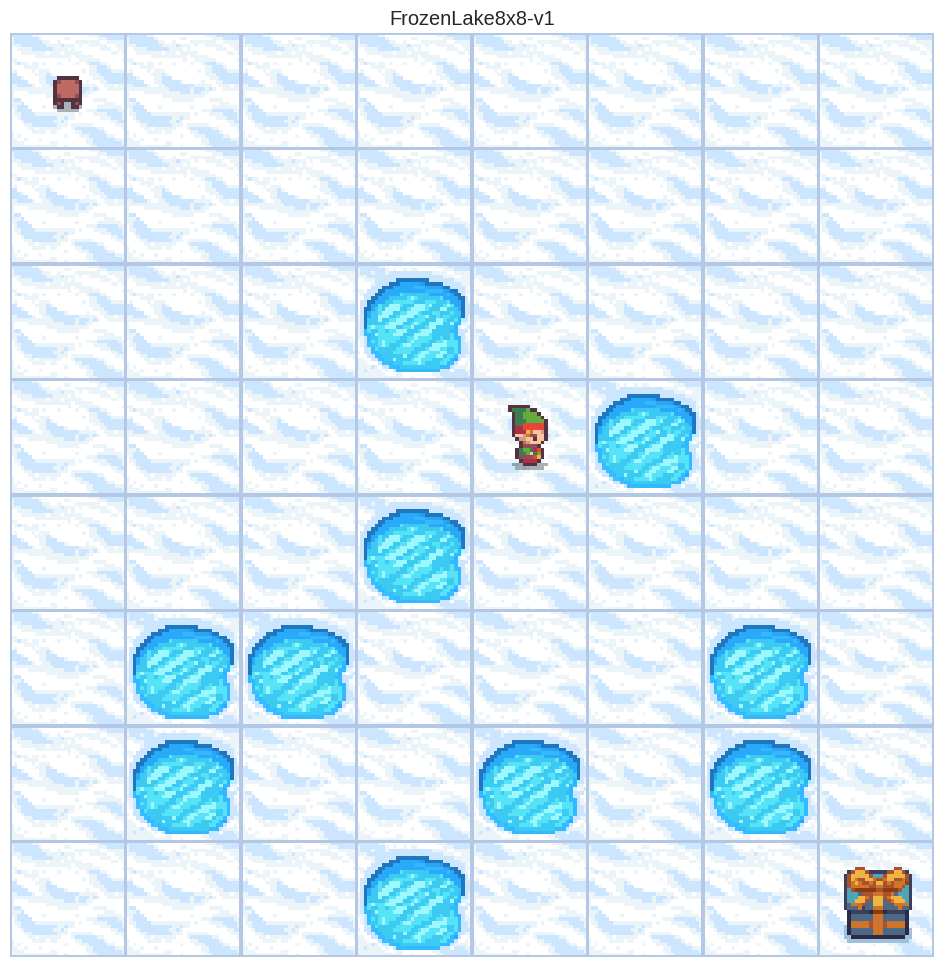

In [19]:
fn_render_env('FrozenLake8x8-v1', 4)